In [1]:
# fundamentals
import os, sys
import numpy as np
import pandas as pd
from calendar import monthrange, month_name
import scipy.stats as stats
import datetime
import imp
import scipy.io as sio
import pickle as pkl

# plotting libraries and setup
from matplotlib.colors import BoundaryNorm
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='serif')
plt.rc('font', size=12)
plt.rc('facecolor', )

# met mast functions and utilities
sys.path.append('../')
import met_funcs as MET
import vis as vis
import utils as utils


# # to read .mat files
# import h5py

In [2]:
datapath = '/Users/nhamilto/Documents/Wake_Dynamics/SiteChar/data/IEC_4/'
monthly_events_files = os.listdir(datapath)

In [32]:
monthly_events_files

['EDCevents_2015_1.csv',
 'EOGevents_2012_8.csv',
 'EOGevents_2012_9.csv',
 'ETMevents_2012_9.csv',
 'EOGevents_2015_1.csv',
 'EDCevents_2012_9.csv',
 'EDCevents_2012_8.csv',
 'ETMevents_2015_1.csv',
 'EWSevents_2015_1.csv']

In [33]:
EWS_events_files = [file for file in monthly_events_files if 'EWS' in file]
EOG_events_files = [file for file in monthly_events_files if 'EOG' in file]
EDC_events_files = [file for file in monthly_events_files if 'EDC' in file]
ETM_events_files = [file for file in monthly_events_files if 'ETM' in file]

In [11]:
EWS_events = pd.DataFrame()
for file in EWS_events_files:
    tmp = pd.read_csv(os.path.join(datapath, file))
    EWS_events = pd.concat([EWS_events, tmp])

In [14]:
params = MET.setup_IEC_params()

alpha_pos = np.load(
    '/Users/nhamilto/Documents/Wake_Dynamics/SiteChar/data/pos_alpha_limit.npy'
)
alpha_neg = np.load(
    '/Users/nhamilto/Documents/Wake_Dynamics/SiteChar/data/neg_alpha_limit.npy'
)
alpha_reference_velocity = np.load(
    '/Users/nhamilto/Documents/Wake_Dynamics/SiteChar/data/alpha_reference_velocity.npy'
)

In [23]:
EWSfilt = EWS_events[(EWS_events['alpha_min'].abs() < 10) & (EWS_events['alpha_max'].abs() < 10)]

/Users/nhamilto/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/nhamilto/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


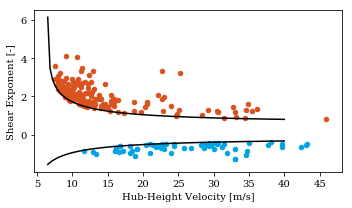

In [31]:
fig, ax = plt.subplots(figsize=(5,3))

ax.plot(alpha_reference_velocity, alpha_pos, 'k')
ax.plot(alpha_reference_velocity, alpha_neg, 'k')

EWSfilt[(EWS_events['alpha_min'] < EWS_events['alpha_neg_limit'])].plot.scatter('WS_mean', 'alpha_min', ax=ax, color='C1')
EWSfilt[(EWS_events['alpha_max'] > EWS_events['alpha_pos_limit'])].plot.scatter('WS_mean', 'alpha_max', ax=ax, color='C2')

ax.set_xlabel('Hub-Height Velocity [m/s]')
ax.set_ylabel('Shear Exponent [-]')

fig.tight_layout()
# fig.savefig()

In [35]:
EOG_events = pd.DataFrame()
for file in EOG_events_files:
    tmp = pd.read_csv(os.path.join(datapath, file))
    EOG_events = pd.concat([EOG_events, tmp])
EOG_events.index = pd.DatetimeIndex(EOG_events.index)

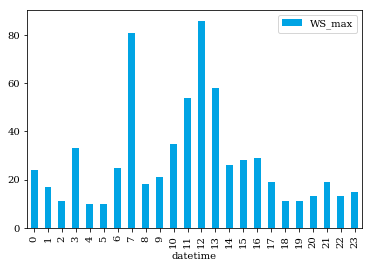

In [59]:
hourly_EOG_events = EOG_events.groupby(EOG_events.index.hour).count()

hourly_EOG_events.plot.bar(y='WS_max', color='C1')

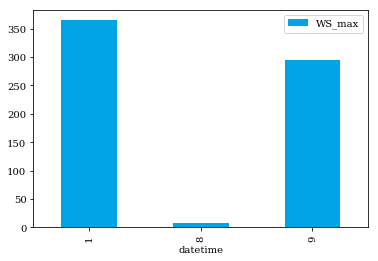

In [60]:
monthly_EOG_events = EOG_events.groupby(EOG_events.index.month).count()

monthly_EOG_events.plot.bar(y='WS_max', color='C1')

In [ ]:
EWS_events = pd.DataFrame()
for file in EWS_events_files:
    tmp = pd.read_csv(os.path.join(datapath, file))
    EWS_events = pd.concat([EWS_events, tmp])